# Cross - sell Prediction

## Problem Statement

Your client is an Insurance company that has provided Health Insurance to its customers now they need your help in building a model to predict whether the policyholders (customers) from past year will also be interested in Vehicle Insurance provided by the company.

An insurance policy is an arrangement by which a company undertakes to provide a guarantee of compensation for specified loss, damage, illness, or death in return for the payment of a specified premium. A premium is a sum of money that the customer needs to pay regularly to an insurance company for this guarantee.

Building a model to predict whether a customer would be interested in Vehicle Insurance is extremely helpful for the company because it can then accordingly plan its communication strategy to reach out to those customers and optimise its business model and revenue. 

Now, in order to predict, whether the customer would be interested in Vehicle insurance, you have information about demographics (gender, age, region code type), Vehicles (Vehicle Age, Damage), Policy (Premium, sourcing channel) etc.

# Importing Libraries

In [42]:
# Data Loading and Numerical Operations
import pandas as pd
import numpy as np
# Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# Data Resampling
from sklearn.utils import resample
# Data Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# Data Splitting
from sklearn.model_selection import train_test_split
# Data Scaling
from sklearn.preprocessing import MinMaxScaler
# Data Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
# Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV
# Ensembling
from mlxtend.classifier import StackingCVClassifier

# Reading Dataset

In [43]:
train = pd.read_csv("train.csv") 
test = pd.read_csv("test.csv")
train.shape, test.shape

((381109, 12), (127037, 11))

In [44]:
train.head(10)


,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
5,6,Female,24,1,33.0,0,< 1 Year,Yes,2630.0,160.0,176,0
6,7,Male,23,1,11.0,0,< 1 Year,Yes,23367.0,152.0,249,0
7,8,Female,56,1,28.0,0,1-2 Year,Yes,32031.0,26.0,72,1
8,9,Female,24,1,3.0,1,< 1 Year,No,27619.0,152.0,28,0
9,10,Female,32,1,6.0,1,< 1 Year,No,28771.0,152.0,80,0


In [45]:
test.head(10)

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,381110,Male,25,1,11.0,1,< 1 Year,No,35786.0,152.0,53
1,381111,Male,40,1,28.0,0,1-2 Year,Yes,33762.0,7.0,111
2,381112,Male,47,1,28.0,0,1-2 Year,Yes,40050.0,124.0,199
3,381113,Male,24,1,27.0,1,< 1 Year,Yes,37356.0,152.0,187
4,381114,Male,27,1,28.0,1,< 1 Year,No,59097.0,152.0,297
5,381115,Male,22,1,30.0,1,< 1 Year,No,40207.0,152.0,266
6,381116,Female,51,1,37.0,1,1-2 Year,No,40118.0,26.0,107
7,381117,Male,25,1,41.0,1,< 1 Year,No,23375.0,152.0,232
8,381118,Male,42,1,41.0,0,1-2 Year,Yes,2630.0,26.0,277
9,381119,Female,37,1,12.0,1,1-2 Year,No,27124.0,124.0,133


In [46]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


This shows an overview of the Columns, non-null count and the data types of the dataset

### Attributes:

* id: Unique ID for the customer
* Gender:	Gender of the customer
* Age: Age of the customer
* Driving_License:
	* 0 : Customer does not have DL
	* 1 : Customer already has DL
* Region_Code:	Unique code for the region of the customer
* Previously_Insured:	
	* 1 : Customer already has Vehicle Insurance
	* 0 : Customer doesn't have Vehicle Insurance
* Vehicle_Age: Age of the Vehicle 
* Vehicle_Damage:
	* 1 : Customer got his/her vehicle damaged in the past.
	* 0 : Customer didn't get his/her vehicle damaged in the past.
* Annual_Premium:	The amount customer needs to pay as premium in the year
* Policy_Sales_Channel:	Anonymised Code for the channel of outreaching to the customer ie. Different Agents, Over Mail, Over Phone, In Person, etc.
* Vintage: Number of Days, Customer has been associated with the company
* Response:	
	* 1 :  Customer is interested
	* 0 : Customer is not interested


# Data Inspecting and Cleaning 

In [47]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [48]:
train.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [49]:
train.duplicated().sum()

0

It shows that there are no Duplicated Values present in the dataset.

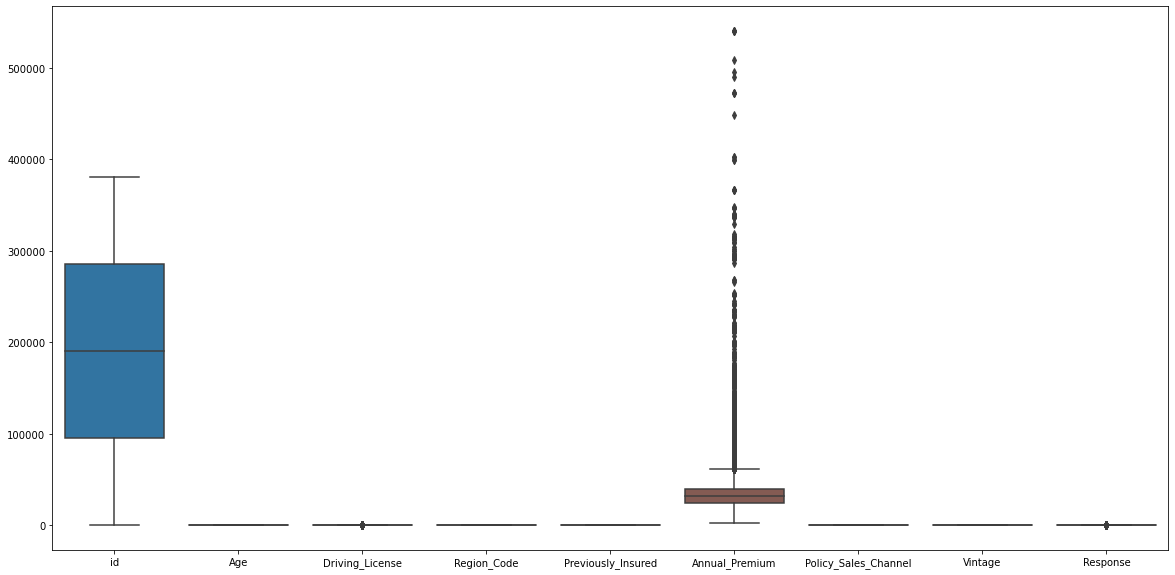

In [50]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=train)
plt.show()

In [51]:
train['Annual_Premium'].max()

540165.0

In [52]:
train = train[train['Annual_Premium']<450000.0]
train.shape

(381099, 12)

In [53]:
train['Response'].value_counts()/381099

0    0.877444
1    0.122556
Name: Response, dtype: float64

In [54]:
dict_gender = {'Male': 1, 'Female':0}
train.replace({"Gender":dict_gender}, inplace=True)
test.replace({"Gender":dict_gender}, inplace=True)
train['Gender'].head(), test['Gender'].head()

(0    1
 1    1
 2    1
 3    1
 4    0
 Name: Gender, dtype: int64,
 0    1
 1    1
 2    1
 3    1
 4    1
 Name: Gender, dtype: int64)

In [55]:
dict_vehicle = {'< 1 Year':0, '1-2 Year':1, '> 2 Years':2}
train.replace({'Vehicle_Age':dict_vehicle}, inplace=True)
test.replace({'Vehicle_Age':dict_vehicle}, inplace=True)
train['Vehicle_Age'].value_counts(), test['Vehicle_Age'].value_counts()

(1    200308
 0    164784
 2     16007
 Name: Vehicle_Age, dtype: int64,
 1    66699
 0    55019
 2     5319
 Name: Vehicle_Age, dtype: int64)

In [56]:
dict_damage = {'Yes': 1, 'No':0}
train.replace({"Vehicle_Damage":dict_damage}, inplace=True)
test.replace({"Vehicle_Damage":dict_damage}, inplace=True)
train['Vehicle_Damage'].value_counts(), test['Vehicle_Damage'].value_counts()

(1    192405
 0    188694
 Name: Vehicle_Damage, dtype: int64,
 1    63835
 0    63202
 Name: Vehicle_Damage, dtype: int64)

# Resampling imbalanced dataset by oversampling positive cases

In [57]:
target1=train[train['Response']==1]
target0=train[train['Response']==0]

In [58]:
target1=resample(target1,replace=True,n_samples=len(target0),random_state=40)

In [59]:
target=pd.concat([target0,target1])

In [60]:
target['Response'].value_counts()

1    334393
0    334393
Name: Response, dtype: int64

In [61]:
train=target
np.shape(train)

(668786, 12)

# Feature Selection


In [62]:
#To idenfify the features that have larger contribution towards the outcome variable, TenYearCHD
X=train.drop(['Response'], axis=1)
y=train['Response']
print("X - ", X.shape, "\ny - ", y.shape)

X -  (668786, 11) 
y -  (668786,)


In [63]:
#Apply SelectKBest and extract top 10 features
best=SelectKBest(score_func=chi2, k=8)

In [64]:
fit=best.fit(X,y)

In [65]:
data_scores=pd.DataFrame(fit.scores_)
data_columns=pd.DataFrame(X.columns)

In [66]:
#Join the two dataframes
scores=pd.concat([data_columns,data_scores],axis=1)
scores.columns=['Feature','Score']
print(scores.nlargest(11,'Score'))

                 Feature         Score
8         Annual_Premium  6.879054e+06
9   Policy_Sales_Channel  8.544009e+05
0                     id  2.116309e+05
5     Previously_Insured  1.711867e+05
2                    Age  1.133694e+05
7         Vehicle_Damage  6.883738e+04
6            Vehicle_Age  3.270213e+04
1                 Gender  1.842183e+03
4            Region_Code  1.059304e+03
10               Vintage  1.624101e+02
3        Driving_License  3.252250e-01


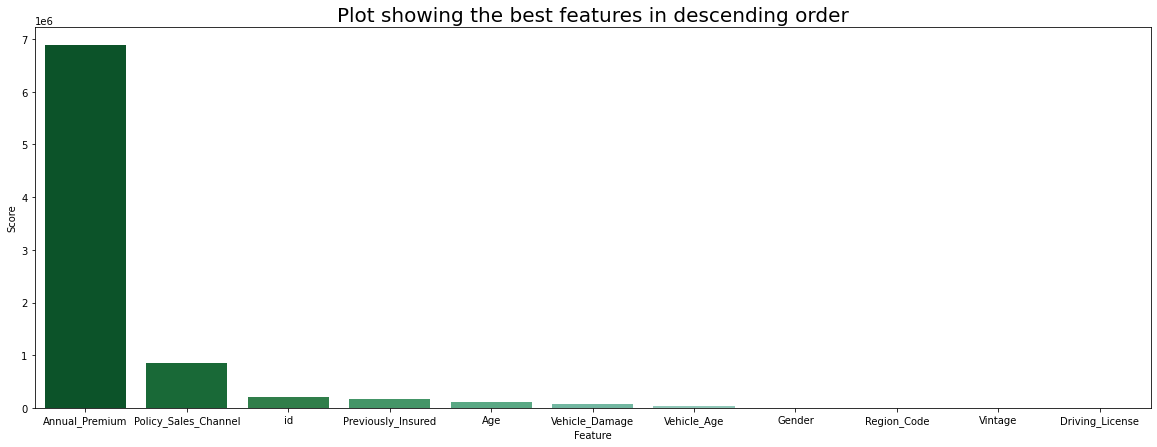

In [67]:
#To visualize feature selection
scores=scores.sort_values(by="Score", ascending=False)
plt.figure(figsize=(20,7), facecolor='w')
sns.barplot(x='Feature',y='Score',data=scores,palette='BuGn_r')
plt.title("Plot showing the best features in descending order", size=20)
plt.show()

This plot shows the `Features` and their respective `chi-square test` scores

In [68]:
#Select 10 features
features=scores["Feature"].tolist()[:8]
features

['Annual_Premium',
 'Policy_Sales_Channel',
 'id',
 'Previously_Insured',
 'Age',
 'Vehicle_Damage',
 'Vehicle_Age',
 'Gender']

In [69]:
train=train[['id',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Previously_Insured',
 'Age',
 'Vehicle_Damage',
 'Vehicle_Age',
 'Gender',
 'Region_Code']]
train.head()

,id,Annual_Premium,Policy_Sales_Channel,Previously_Insured,Age,Vehicle_Damage,Vehicle_Age,Gender,Region_Code
1,2,33536.0,26.0,0,76,0,1,1,3.0
3,4,28619.0,152.0,1,21,0,0,1,11.0
4,5,27496.0,152.0,1,29,0,0,0,41.0
5,6,2630.0,160.0,0,24,1,0,0,33.0
6,7,23367.0,152.0,0,23,1,0,1,11.0


In [70]:
test=test[['id',
 'Annual_Premium',
 'Policy_Sales_Channel',
 'Previously_Insured',
 'Age',
 'Vehicle_Damage',
 'Vehicle_Age',
 'Gender',
 'Region_Code']]
test.head()

,id,Annual_Premium,Policy_Sales_Channel,Previously_Insured,Age,Vehicle_Damage,Vehicle_Age,Gender,Region_Code
0,381110,35786.0,152.0,1,25,0,0,1,11.0
1,381111,33762.0,7.0,0,40,1,1,1,28.0
2,381112,40050.0,124.0,0,47,1,1,1,28.0
3,381113,37356.0,152.0,1,24,1,0,1,27.0
4,381114,59097.0,152.0,1,27,0,0,1,28.0


# Feature Splitting and Scaling

In [71]:
train_x=train.drop("id", axis=1)
train_y=y
test_x=test.drop("id", axis=1)
train_x.shape, train_y.shape, test_x.shape

((668786, 8), (668786,), (127037, 8))

We divide the dataset into training and test sub-datasets for predictive modeling

In [72]:
#scaler = MinMaxScaler()
#train_x = scaler.fit_transform(train_x)
#test_x = scaler.transform(test_x)

# Predictive Modeling

We use the following different machine learning models for the dataset:

1. Logistic Regressor
2. K-Nearest Neighbour Classifier
3. Random Forest Classifier
4. Decision Tree Classifier
5. Gradient Boosting Classifier

In [73]:
m1 = 'LogisticRegression'
lr = LogisticRegression(random_state=1, max_iter=1000)
model = lr.fit(train_x, train_y)
lr_predict = lr.predict(test_x)
lr_predict

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [74]:
res = pd.DataFrame({
    "id":test["id"],
    "Response":lr_predict
})
res.to_csv("logistic_prediction_results.csv", index=None)
pd.read_csv("logistic_prediction_results.csv").shape

(127037, 2)

In [75]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=30, random_state=0,max_depth=5)
rf.fit(train_x,train_y)
rf_predicted = rf.predict(test_x)
rf_predicted

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [76]:
res = pd.DataFrame({
    "id":test["id"],
    "Response":rf_predicted
})
res.to_csv("randomforest_prediction_results.csv", index=None)
pd.read_csv("randomforest_prediction_results.csv").shape

(127037, 2)

In [77]:
m4 = 'DecisionTreeClassifier'
dt = DecisionTreeClassifier(criterion = 'entropy',random_state=0,max_depth = 30)
dt.fit(train_x,train_y)
dt_predicted = dt.predict(test_x)
dt_predicted

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [78]:
res = pd.DataFrame({
    "id":test["id"],
    "Response":dt_predicted
})
res.to_csv("decisiontree_prediction_results.csv", index=None)
pd.read_csv("decisiontree_prediction_results.csv").shape

(127037, 2)

In [79]:
m5 = 'Gradient Boosting Classifier'
gvc =  GradientBoostingClassifier()
gvc.fit(train_x,train_y)
gvc_predicted = gvc.predict(test_x)
gvc_predicted

array([0, 1, 1, ..., 0, 0, 0], dtype=int64)

In [80]:
res = pd.DataFrame({
    "id":test["id"],
    "Response":gvc_predicted
})
res.to_csv("gradientboosting_prediction_results.csv", index=None)
pd.read_csv("gradientboosting_prediction_results.csv").shape

(127037, 2)